潜在语义分析LSA(latent semantic analysis)和潜在语义索引(latent semantic index)，是一种通过SVD分解快速计算文本主题的方法.<br>
A = U*B*V, 其中A表示文档向量（一般为TF-IDF）， U表示文档-主题相关度矩阵、B表示主题-词义相关度矩阵、V表示词义-词语相关度矩阵。或者可以反过来理解（取决于文档向量A的行与列的定义）<br>
这种方法并非基于统计，属于无监督学习，快速简单，但存在SVD分解耗时、主题数K自定义、难以解释等缺点，适合粗粒度、快速场景。

#### 一个简单的例子

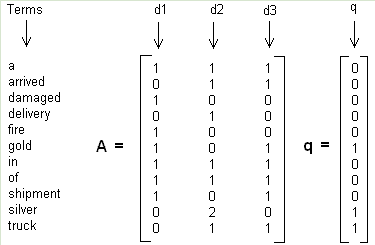

In [1]:
import numpy as np
A = np.array([[1,0,1,0,1,1,1,1,1,0,0], [1,1,0,1,0,0,1,1,0,2,1], [0,0,0,0,0,1,0,0,0,1,1]]).T
A

array([[1, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [0, 2, 1],
       [0, 1, 1]])

In [16]:
U,s,VT = np.linalg.svd(A, full_matrices=False)

In [17]:
# 这里，U表示词语-词义矩阵
U

array([[-0.36380078, -0.19156776,  0.23981928],
       [-0.23061355,  0.19050295,  0.25841056],
       [-0.13318722, -0.38207071, -0.01859128],
       [-0.23061355,  0.19050295,  0.25841056],
       [-0.13318722, -0.38207071, -0.01859128],
       [-0.21715968, -0.29925338, -0.69877685],
       [-0.36380078, -0.19156776,  0.23981928],
       [-0.36380078, -0.19156776,  0.23981928],
       [-0.13318722, -0.38207071, -0.01859128],
       [-0.54519957,  0.46382323, -0.16336446],
       [-0.31458601,  0.27332028, -0.42177502]])

In [18]:
# 这里 s 表示 语义-主题 矩阵
s

array([3.58119835, 2.29943934, 1.37389851])

In [19]:
# 这里 VT表示 主题-文档 矩阵
VT

array([[-0.47696986, -0.82587288, -0.30072204],
       [-0.87854842,  0.43804997,  0.19043343],
       [-0.02554253,  0.35502988, -0.93450595]])

**通过 主题-文档 矩阵 计算两个文本间的相似度**

In [22]:
# 通过夹角余弦计算相似度
np.dot(VT[:,1],VT[:,2])/(np.sqrt(np.sum(VT[:,1]**2))*np.sqrt(np.sum(VT[:,2]**2)))

5.551115123125784e-17